In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(df.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0         0 

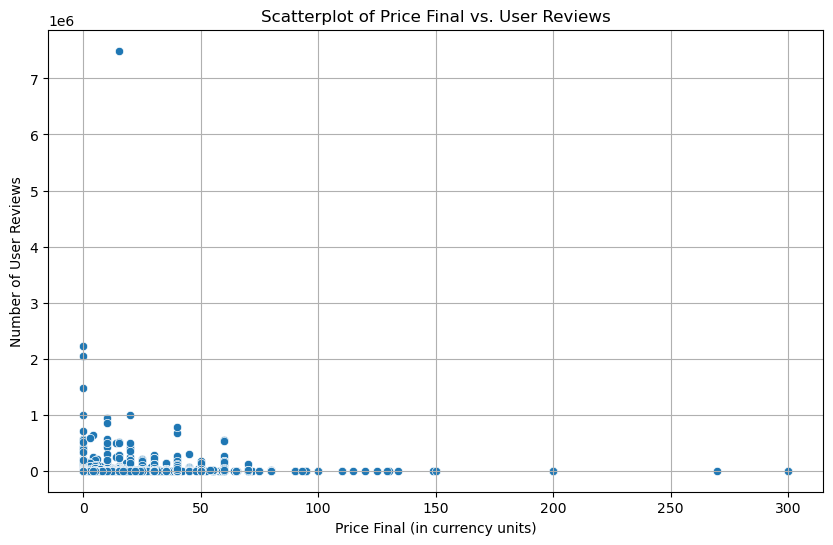

0.031342827848759115


In [21]:
df = pd.read_json('gamesexit.json')

df['price_final'] = pd.to_numeric(df['price_final'], errors='coerce')
df['user_reviews'] = pd.to_numeric(df['user_reviews'], errors='coerce')

# Drop rows with missing values in the columns we want to plot
df_clean = df.dropna(subset=['price_final', 'user_reviews'])

# Create a scatterplot with 'price_final' on the x-axis and 'user_review' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_final', y='user_reviews', data=df_clean)
plt.title('Scatterplot of Price Final vs. User Reviews')
plt.xlabel('Price Final (in currency units)')
plt.ylabel('Number of User Reviews')
plt.grid(True)
plt.show()

correlation = df_clean['price_final'].corr(df_clean['user_reviews'], method='pearson')
print(correlation)

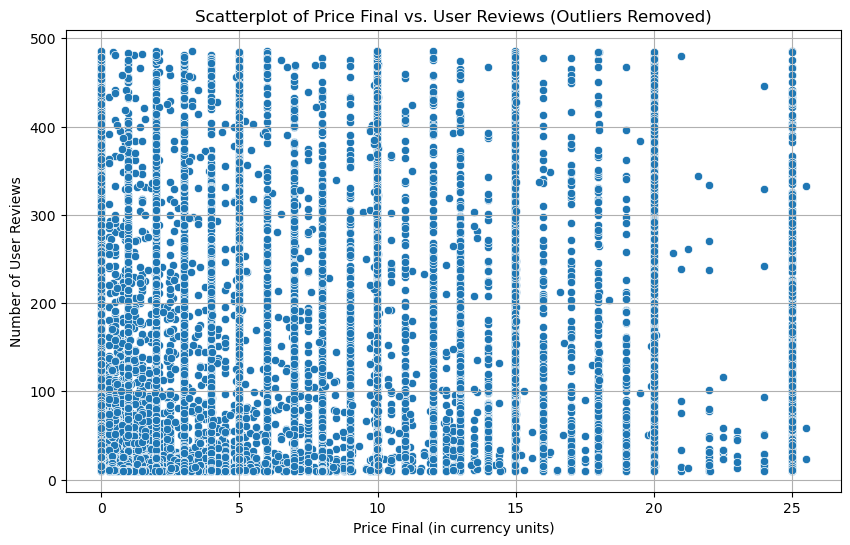

0.031342827848759115


In [23]:
# Calculate IQR for 'price_final'
Q1_price = df_clean['price_final'].quantile(0.25)
Q3_price = df_clean['price_final'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate IQR for 'user_reviews'
Q1_reviews = df_clean['user_reviews'].quantile(0.25)
Q3_reviews = df_clean['user_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Define lower and upper bounds for both columns to identify outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

df_filtered = df_clean[(df_clean['price_final'] >= lower_bound_price) & (df_clean['price_final'] <= upper_bound_price) & 
                       (df_clean['user_reviews'] >= lower_bound_reviews) & (df_clean['user_reviews'] <= upper_bound_reviews)]

# Create a scatterplot with 'price_final' on the x-axis and 'user_reviews' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_final', y='user_reviews', data=df_filtered)
plt.title('Scatterplot of Price Final vs. User Reviews (Outliers Removed)')
plt.xlabel('Price Final (in currency units)')
plt.ylabel('Number of User Reviews')
plt.grid(True)
plt.show()
correlation = df_clean['price_final'].corr(df_clean['user_reviews'], method='pearson')
print(correlation)